# Linear Regression

In [2]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy as sp
import scipy.sparse.linalg as linalg
import scipy.cluster.hierarchy as hr
from scipy.spatial.distance import pdist, squareform

import sklearn.datasets as datasets
import sklearn.metrics as metrics
import sklearn.utils as utils
import sklearn.linear_model as linear_model
import sklearn.cross_validation as cross_validation
import sklearn.cluster as cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

from patsy import dmatrices

import seaborn as sns
%matplotlib inline

### Basics on Linear Regression

##### The Linear Regression Model 

$$Y = \alpha +\beta X +\epsilon$$
    
We **know**: $X$ and $Y$

We **do not know **: $\alpha$, $\beta$ and $\epsilon$

**Goal:** Given $X$ and $Y$ produce estimates of $\alpha$ and $\beta$ denoted by $\widehat{\alpha}$ and $\widehat{\beta}$ 


##### Input/output

Input data comes in the form of pairs $\left(X_i,Y_i\right)$  for $i=1,\ldots ,n$

The **true regression line **: For **every** individual it should hold that:
$$Y_i = \alpha +\beta X_i +\epsilon_i$$


**Error** for the $i$-th data point is: $$ \epsilon_i = Y_i-\alpha-\beta X_i $$


The **estimated regression line ** : $$\widehat{Y_i}=\widehat{\alpha}+\widehat{\beta}X_i$$


**Residuals** measure distance between each observation from the estimated regression line and are defined as follows: $$\widehat{\epsilon_i} = Y_i-\widehat{Y_i}$$

##### Ordinary Least Squares Regression as an optimization problem

**Question**: How do we find $\widehat{\alpha}$ and $\widehat{\beta}$?

**Answer**: By minimizing the residuals, or *sum of squared residuals* :

\begin{eqnarray}
\text{SSR} & = & \sum_{i=1}^n \widehat{\epsilon_i}^2 \\
& = & \sum_{i=1}^n \left(Y_i-\widehat{Y_i}\right)^2
\end{eqnarray}

$\alpha,\beta$ are called **regression coefficients**

$\widehat{\alpha},\widehat{\beta}$ are called ** OLS (Ordinary Least Squares} regression coefficients**

$\alpha$ (or $\widehat{\alpha}$) is not so interesting

$\beta$ (or $\widehat{\beta}$) is more interesting as it shows the change in $Y$ that can be caused by a unit of change in $X$

##### Measuring the fit of a regression model and $R^2$

The most common measure of fit is referred to as $R^2$

$R^2$ measures the variability of $Y$ that can be explained by $X$

Derivation:
    $$\text{Var}(Y) =\frac{\sum_{i=1}^n \left(Y_i-\overline{Y}\right)}{n-1} $$
where:
$\overline{Y}=\frac{1}{n}\sum_{i=1}^nY_i$

Total Sum of Squares (TSS) is:

$$\text{TSS} = \sum_{i=1}^n\left(Y_i-\overline{Y}\right)^2 $$


Now we can show that:

$$\text{TSS} = \text{SSR} + \text{RSS},$$

where Sum of Squares Residuals (SSR) is:
$$\text{SSR} = \sum_{i=1}^n \left(Y_i-\widehat{Y_i}\right)^2,$$

and Regresion Sum of Squares (RSS) is:

$$\text{RSS} = \sum_{i=1}^n \left(\widehat{Y_i}-\overline{Y}\right)^2,$$


Variability in $Y$ can be due to explained (RSS) and unexplained parts (SSR).


Measure of fit $R^2$:

\begin{eqnarray}
R^2 & = & \frac{\text{RSS}}{\text{TSS}} = 1-\frac{\text{SSR}}{\text{TSS}}
\end{eqnarray}


$0\leq R^2\leq 1$; the closer the value of $R^2$ is to $1$ the better the fit of the regression; small values of SSR imply that the residuals are small and therefore we have a better fit.

##### How accurate are the estimates $\widehat{\alpha}$ and $\widehat{\beta}$

95% Confidence interval $[x,y]$ for $\widehat{\alpha}$: We are 95% certain that $\alpha$ lies in $[x,y]$

##### Example - I

Generate a dataset using the **datasets.makeregression( )** function

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [5]:
X, y = datasets.make_regression(n_samples=100, n_features=1, bias=0.1, noise=30, random_state=1)
print X.shape, y.shape
print X
print y

(100, 1) (100,)
[[-0.61175641]
 [-0.24937038]
 [ 0.48851815]
 [ 0.76201118]
 [ 1.51981682]
 [ 0.37756379]
 [ 0.51292982]
 [-0.67124613]
 [-1.39649634]
 [ 0.31563495]
 [-0.63699565]
 [-0.39675353]
 [-1.10061918]
 [ 0.90085595]
 [-1.09989127]
 [ 0.82797464]
 [-0.07557171]
 [-0.35224985]
 [-0.67066229]
 [-1.07296862]
 [-0.30620401]
 [ 2.18557541]
 [ 0.86540763]
 [ 0.19829972]
 [-0.38405435]
 [-0.68372786]
 [ 0.05080775]
 [ 0.58281521]
 [ 1.25286816]
 [-0.75439794]
 [-0.34934272]
 [-0.88762896]
 [ 0.18656139]
 [ 0.87616892]
 [ 0.83898341]
 [-0.50446586]
 [-0.34385368]
 [ 1.6924546 ]
 [-2.3015387 ]
 [ 0.93110208]
 [ 2.10025514]
 [ 1.46210794]
 [-0.84520564]
 [-0.87785842]
 [-0.3224172 ]
 [ 0.88514116]
 [ 0.16003707]
 [ 1.13162939]
 [-0.37528495]
 [ 0.50249434]
 [-0.20889423]
 [ 0.12015895]
 [ 0.58662319]
 [ 0.3190391 ]
 [-0.69166075]
 [ 0.69803203]
 [ 1.19891788]
 [-0.20075807]
 [ 0.53035547]
 [ 0.74204416]
 [ 0.41005165]
 [ 0.11900865]
 [-0.7612069 ]
 [ 0.42349435]
 [ 0.30017032]
 [-1.1425

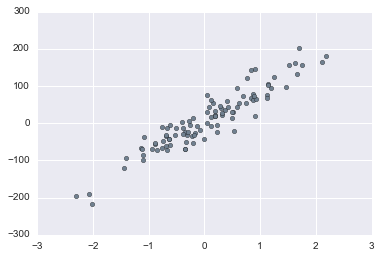

In [6]:
plt.scatter(X, y, c="slategray")

In [7]:
model = sm.OLS(y, X)
results = model.fit()
print results.summary()
print "Confidence Intervals:", results.conf_int()
print "Parameters:", results.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     696.8
Date:                Mon, 28 Mar 2016   Prob (F-statistic):           1.34e-46
Time:                        11:20:34   Log-Likelihood:                -475.26
No. Observations:                 100   AIC:                             952.5
Df Residuals:                      99   BIC:                             955.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            83.8472      3.176     26.396      0.0

A more detailed explanation of the results can be found here:
http://connor-johnson.com/2014/02/18/linear-regression-with-python/

In [ ]:
plt.scatter(X,y, c="slategray")
plt.plot(X,results.predict(X), c='seagreen', alpha=0.8)

##### Multidimensional data

** Input **: $(Y,X_1,X_2,\ldots , X_k)$

$Y_i = \alpha +\beta_1X_1+\beta_2X_2+\ldots  + \beta_k X_k$

**Output **: Estimates $\widehat{\alpha},\widehat{\beta_i}$ for $i=1\ldots k$ that minimize

$\text{SSR} = \sum_{i=1}^n\left(\widehat{Y_i} - \widehat{\alpha} -\widehat{\beta_1}X_1-\widehat{\beta_2}X_2-\ldots - \widehat{\beta_k} X_k\right)^2$


##### Example - II

Use again the **datasets.makeregression( )** function

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression

In [ ]:
X, y = datasets.make_regression(n_samples=100, n_features=20, n_informative=5, bias=0.1, noise=30, random_state=1)
print X.shape, y.shape

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print results.summary()
print "Confidence Intervals:", results.conf_int()
print "Parameters:", results.params

### Analyzing CA housing dataset

In [9]:
ca = pd.read_table("datasets/cal_housing.data", sep=',')

attributes = ['longitude',
            'latitude',
            'housingMedianAge',
            'totalRooms',
            'totalBedrooms',
            'population',
            'households',
            'medianIncome',
            'medianHouseValue']

ca.columns = attributes

print ca.info()
ca

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20639 entries, 0 to 20638
Data columns (total 9 columns):
longitude           20639 non-null float64
latitude            20639 non-null float64
housingMedianAge    20639 non-null float64
totalRooms          20639 non-null float64
totalBedrooms       20639 non-null float64
population          20639 non-null float64
households          20639 non-null float64
medianIncome        20639 non-null float64
medianHouseValue    20639 non-null float64
dtypes: float64(9)
memory usage: 1.6 MB
None


,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
1,-122.24,37.85,52,1467,190,496,177,7.2574,352100
2,-122.25,37.85,52,1274,235,558,219,5.6431,341300
3,-122.25,37.85,52,1627,280,565,259,3.8462,342200
4,-122.25,37.85,52,919,213,413,193,4.0368,269700
5,-122.25,37.84,52,2535,489,1094,514,3.6591,299200
6,-122.25,37.84,52,3104,687,1157,647,3.1200,241400
7,-122.26,37.84,42,2555,665,1206,595,2.0804,226700
8,-122.25,37.84,52,3549,707,1551,714,3.6912,261100
9,-122.26,37.85,52,2202,434,910,402,3.2031,281500


<class 'pandas.core.frame.DataFrame'>
(20639, 8)
Index([u'longitude', u'latitude', u'housingMedianAge', u'totalRooms',
       u'totalBedrooms', u'population', u'households', u'medianIncome',
       u'medianHouseValue'],
      dtype='object')
0        358500
1        352100
2        341300
3        342200
4        269700
5        299200
6        241400
7        226700
8        261100
9        281500
10       241800
11       213500
12       191300
13       159200
14       140000
15       152500
16       155500
17       158700
18       162900
19       147500
20       159800
21       113900
22        99700
23       132600
24       107500
25        93800
26       105500
27       108900
28       132000
29       122300
          ...  
20609     45500
20610     47000
20611     48300
20612     53400
20613     58000
20614     57500
20615     55100
20616     70800
20617     63400
20618     99100
20619    100000
20620     77500
20621     67000
20622     65500
20623     87200
20624     72000
20625 

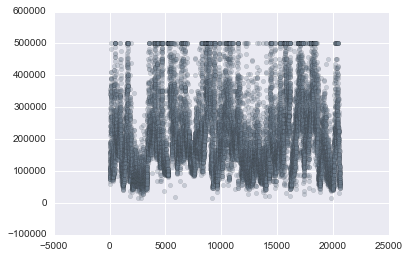

In [10]:
print type(ca)
X = ca[['longitude','latitude','housingMedianAge','totalRooms','totalBedrooms','population','households','medianIncome']]
print X.shape
print ca.keys()
print ca.medianHouseValue
y = ca.medianHouseValue;
print y.shape
plt.scatter(range(len(y)), y, c="slategray", alpha=0.3, linewidths=0.2)
#print ca.head(100)

In [11]:
X, y = utils.shuffle(X, y, random_state=1)

Split the data into training and testing

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

(12383, 8) (12383,)
(8256, 8) (8256,)


In [24]:
print X_train[X_train.columns[0]]
'''
subX_train = X_train[X_train.columns[0]]
subX_test = X_test[X_test.columns[0]]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
# plt.scatter(subX_test, y_test, c="seagreen", alpha=0.2, linewidths=0.3)
plt.xlabel('Data')
plt.ylabel('Target');
'''

17929   -121.96
5579    -118.30
7206    -118.18
12271   -116.99
12254   -117.02
8054    -118.18
17197   -119.75
1435    -122.01
193     -122.25
7964    -118.19
3405    -118.30
5054    -118.35
7457    -118.18
18525   -122.04
15587   -116.66
9577    -120.49
8974    -118.41
11463   -117.99
14909   -117.05
1716    -122.32
17669   -121.87
12962   -121.32
2547    -124.18
8554    -118.40
13865   -117.27
13649   -117.31
17658   -121.88
14181   -117.06
10800   -117.95
6680    -118.09
          ...  
2976    -119.06
8033    -118.13
18300   -122.14
3855    -118.43
2828    -119.08
19092   -122.61
4996    -118.28
3198    -119.65
15777   -122.41
15675   -122.43
4748    -118.34
18423   -121.81
3394    -118.30
16440   -121.29
6386    -118.07
10565   -117.76
15513   -117.06
18764   -122.27
8518    -118.32
256     -122.19
1791    -122.38
5324    -118.43
13839   -117.30
18215   -122.07
20614   -121.54
12857   -121.38
18755   -122.36
6692    -118.08
20006   -119.03
1783    -122.36
Name: longitude, dtype: 

'\nsubX_train = X_train[X_train.columns[0]]\nsubX_test = X_test[X_test.columns[0]]\nplt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)\n# plt.scatter(subX_test, y_test, c="seagreen", alpha=0.2, linewidths=0.3)\nplt.xlabel(\'Data\')\nplt.ylabel(\'Target\');\n'

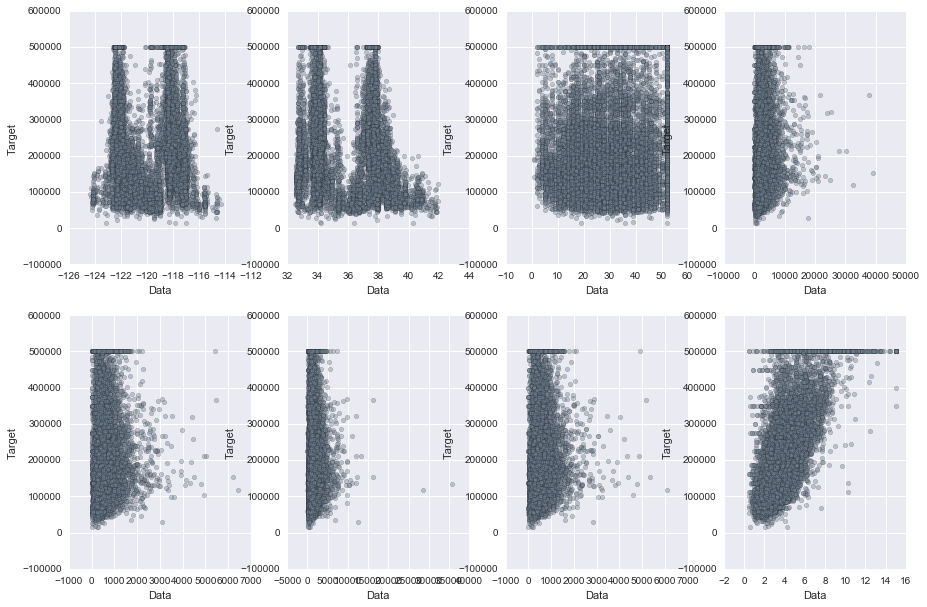

In [14]:
fig, axes = plt.subplots(2,4,figsize=(15,10))

for i in range(8):
    plt_i = i // 4
    plt_j = i % 4
    subX_train = X_train[X_train.columns[i]]
    # plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel('Data')
    axes[plt_i][plt_j].set_ylabel('Target'); 

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:
regr = linear_model.LinearRegression()

Fit the model

In [16]:
print X_train.shape
regr.fit(X_train, y_train);

(12383, 8)


The coefficients and the bias are now computed

In [17]:
# The mean square error
print("Training error: ", metrics.mean_squared_error(regr.predict(X_train),y_train))
print("Test     error: ", metrics.mean_squared_error(regr.predict(X_test),y_test))

('Training error: ', 4822096433.4630985)
('Test     error: ', 4854256581.096406)


##### The score( ) function of python's LinearRegression

Returns the coefficient of determination R^2 of the prediction.

The coefficient $R^2$ is defined as $(1 - u/v)$, where u is the regression sum of squares ((y_true - y_pred)^2).sum( ) and v is the residual sum of squares ((y_true - y_true.mean( ))^2).sum( ). Best possible score is 1.0, lower values are worse.

In [18]:
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)
print("Training score: ", train_score)
print("Test     score: ", test_score)

('Training score: ', 0.6384985627832489)
('Test     score: ', 0.63428183645634406)


In [19]:
coefficients = regr.coef_
for i in range(len(coefficients)):
    print ca.columns[i],"\t",coefficients[i]

longitude 	-43727.6753064
latitude 	-43302.5973676
housingMedianAge 	1229.97413571
totalRooms 	-6.87272302104
totalBedrooms 	104.81262425
population 	-38.16434546
households 	50.3145669236
medianIncome 	40269.937813


In [20]:
print pd.DataFrame(zip(ca.columns, np.transpose(coefficients)))

                  0             1
0         longitude -43727.675306
1          latitude -43302.597368
2  housingMedianAge   1229.974136
3        totalRooms     -6.872723
4     totalBedrooms    104.812624
5        population    -38.164345
6        households     50.314567
7      medianIncome  40269.937813


In [21]:
regr = linear_model.LinearRegression()
scores = cross_validation.cross_val_score(regr, X, y, cv=5)
print scores

[ 0.63323942  0.6352469   0.6188496   0.65077248  0.63647435]


In [22]:
print("Regression score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Regression score: 0.63 (+/- 0.02)


##### Visualizing the results of linear regression

In [ ]:
subX_train = X_train[X_train.columns[0]]
subX_test = X_test[X_test.columns[0]]
plt.scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
plt.plot(subX_train, coefficients[0]*subX_train, color='seagreen', linewidth=3, alpha=.8);
plt.xlabel('Data')
plt.ylabel('Target');

### Food for thought: Analyzing Boston housing dataset

In [ ]:
boston = datasets.load_boston()

In [ ]:
print boston.data.shape
print type(boston.data)
X = boston.data
print X.shape
print boston.feature_names
print boston.target
y = boston.target;
print y.shape
plt.scatter(range(len(y)), y, c="slategray", alpha=0.4, linewidths=0.3)


In [ ]:
X, y = utils.shuffle(X, y, random_state=1)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
print(X_train.shape), y_train.shape
print(X_test.shape), y_test.shape

In [ ]:
regr = linear_model.LinearRegression()
print X_train.shape
regr.fit(X_train, y_train);
# The mean square error
print("Training error: ", np.mean((regr.predict(X_train) - y_train) ** 2))
print("Test     error: ", np.mean((regr.predict(X_test) - y_test) ** 2))

In [ ]:
train_score = regr.score(X_train,y_train)
test_score = regr.score(X_test,y_test)
print("Training score: ", train_score)
print("Test     score: ", test_score)

In [ ]:
coefficients = regr.coef_
for i in range(len(coefficients)):
    print boston.feature_names[i],"\t",coefficients[i]

In [ ]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()